Libraries

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import plotly.express as px
import plotly.graph_objects as go
from google.colab import files
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Loading Returns

In [ ]:
url1 = 'https://raw.githubusercontent.com/giorgioterranova/QARM/main/returns_clean2.csv'
returns = pd.read_csv(url1, on_bad_lines='skip', sep=';',decimal=',')
returns.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
returns = returns.set_index('Date')
returns.astype('float')
returns = returns.select_dtypes(include=['number'])
prices = returns.copy()
returns = returns.pct_change()
returns = returns.iloc[18:]
returns.drop(returns.tail(5).index,inplace=True)
returns.head(10)

,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,AEVIS VICTORIA,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
Date,,,,,,,,,,,,,,,,,,,,,
7/1/01,-0.147974,-0.075621,NaN,0.020439,-0.084609,NaN,-0.099370,0.043386,NaN,-0.058223,...,NaN,NaN,NaN,-0.038962,0.036036,NaN,0.009384,NaN,0.041946,0.012478
8/1/01,-0.287020,-0.027302,NaN,0.024025,-0.119001,NaN,-0.025027,-0.086441,NaN,-0.011351,...,NaN,NaN,NaN,-0.034316,0.052174,NaN,0.013968,NaN,-0.083736,0.023261
9/1/01,-0.161538,0.011247,NaN,-0.020741,-0.039002,NaN,-0.066516,-0.139795,NaN,-0.082365,...,NaN,NaN,NaN,-0.103567,0.016529,NaN,-0.027551,NaN,-0.173989,-0.090887
10/1/01,-0.327220,-0.020357,NaN,-0.102199,-0.074946,NaN,-0.300008,-0.274993,NaN,-0.227289,...,NaN,NaN,NaN,-0.121174,-0.081301,NaN,-0.066509,NaN,-0.291488,0.000000
11/1/01,0.290917,0.000000,NaN,-0.051276,0.293653,NaN,0.303564,0.051760,NaN,-0.044095,...,NaN,NaN,NaN,0.069590,0.053097,NaN,0.061147,NaN,0.124622,0.000000
12/1/01,0.169015,-0.037709,NaN,0.000000,0.093941,NaN,0.179473,0.114699,NaN,-0.092328,...,NaN,NaN,NaN,0.143373,0.000000,NaN,0.019036,NaN,0.108146,0.066634
1/1/02,-0.036151,0.029390,NaN,0.075654,0.240054,NaN,0.048199,0.000000,NaN,-0.067787,...,NaN,NaN,NaN,0.032668,0.016807,NaN,0.004693,NaN,-0.061445,0.203126
2/1/02,-0.137496,-0.190493,NaN,-0.095471,-0.115417,NaN,0.019394,-0.085260,NaN,-0.100017,...,NaN,NaN,NaN,-0.066324,0.033058,NaN,0.032561,NaN,-0.139926,-0.064914
3/1/02,-0.043476,0.000000,NaN,0.000000,0.105134,NaN,0.097817,-0.163943,NaN,-0.015167,...,NaN,NaN,NaN,-0.017491,0.008000,NaN,0.018007,NaN,0.014926,-0.165271


In [ ]:
prices = prices.iloc[17:]
prices.drop(prices.tail(5).index,inplace=True)
prices

,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,AEVIS VICTORIA,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
Date,,,,,,,,,,,,,,,,,,,,,
6/1/01,2268.51,221.50,NaN,348.35,95.38,NaN,449.43,122.85,NaN,226.37,...,NaN,NaN,NaN,411.17,1.11,NaN,216.33,NaN,3169.34,242.03
7/1/01,1932.83,204.75,NaN,355.47,87.31,NaN,404.77,128.18,NaN,213.19,...,NaN,NaN,NaN,395.15,1.15,NaN,218.36,NaN,3302.28,245.05
8/1/01,1378.07,199.16,NaN,364.01,76.92,NaN,394.64,117.10,NaN,210.77,...,NaN,NaN,NaN,381.59,1.21,NaN,221.41,NaN,3025.76,250.75
9/1/01,1155.46,201.40,NaN,356.46,73.92,NaN,368.39,100.73,NaN,193.41,...,NaN,NaN,NaN,342.07,1.23,NaN,215.31,NaN,2499.31,227.96
10/1/01,777.37,197.30,NaN,320.03,68.38,NaN,257.87,73.03,NaN,149.45,...,NaN,NaN,NaN,300.62,1.13,NaN,200.99,NaN,1770.79,227.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/1/22,4597.25,0.11,59.13,577.10,2427.12,1.32,362.33,81.71,33.83,303.66,...,129.47,204.77,266.45,2135.46,0.08,174.85,1434.35,131.33,7748.52,77.33
3/1/22,4375.54,0.11,33.04,577.10,2427.12,1.26,328.01,81.71,33.83,320.30,...,114.65,204.77,236.65,1997.85,0.07,174.85,1401.84,93.56,7220.21,92.42
4/1/22,4446.83,0.11,45.22,577.10,2427.12,1.16,329.13,76.29,33.83,378.54,...,140.37,204.77,242.97,2010.59,0.08,181.06,1474.98,84.18,8118.34,89.12


In [ ]:
# loading B2M
url10 = 'https://raw.githubusercontent.com/giorgioterranova/QARM/main/shares_y.csv'
shares = pd.read_csv(url10, on_bad_lines='skip', sep=';')

In [ ]:
shares.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
shares = shares.set_index('Date')
shares.astype('float')
shares = shares.select_dtypes(include=['number'])
shares

,ABB LTD N - NUMBER OF SHARES,ACCU HOLDING 'R' DEAD - 28/04/17 - NUMBER OF SHARES,ACHIKO N - NUMBER OF SHARES,ACINO HOLDING DEAD - 17/09/14 - NUMBER OF SHARES,ACTELION DEAD - 07/11/17 - NUMBER OF SHARES,ADDEX THERAPEUTICS - NUMBER OF SHARES,ADECCO GROUP - NUMBER OF SHARES,ADVAL TECH N - NUMBER OF SHARES,ADVANCED DIG.BRDCT.HDG. DEAD - 17/03/15 - NUMBER OF SHARES,AEVIS VICTORIA - NUMBER OF SHARES,...,WEATHERFORD INTL. - NUMBER OF SHARES,WINTERTHUR TECHNOLOGIE DEAD - 20/12/11 - NUMBER OF SHARES,YPSOMED HOLDING R - NUMBER OF SHARES,ZEHNDER GROUP - NUMBER OF SHARES,ZUBLIN IM.HLDG. - NUMBER OF SHARES,ZUG ESTATES HOLDINGS - NUMBER OF SHARES,ZUGER KANTONALBANK - NUMBER OF SHARES,ZUR ROSE - NUMBER OF SHARES,ZURICH INSURANCE GROUP - NUMBER OF SHARES,ZWAHLEN &.MAYR - NUMBER OF SHARES
Date,,,,,,,,,,,,,,,,,,,,,
2000,300002,25,NaN,160,NaN,NaN,17698,200,NaN,160,...,NaN,NaN,NaN,271,10304,NaN,266,NaN,48611,40
2001,300002,25,NaN,160,4733.0,NaN,18510,200,NaN,161,...,NaN,NaN,NaN,271,28475,NaN,266,NaN,83886,40
2002,1200008,25,NaN,160,21069.0,NaN,185969,200,NaN,808,...,NaN,NaN,NaN,271,28526,NaN,266,NaN,83886,40
2003,1200008,25,NaN,122,21332.0,NaN,186798,200,NaN,820,...,NaN,NaN,NaN,244,29763,NaN,266,NaN,143878,40
2004,2040012,25,NaN,122,21624.0,NaN,186905,200,NaN,832,...,NaN,NaN,NaN,244,29763,NaN,288,NaN,144007,40
2005,2070314,100,NaN,122,22125.0,NaN,187164,365,NaN,838,...,NaN,NaN,11016.0,244,29763,NaN,288,NaN,144007,40
2006,2070314,100,NaN,3038,22370.0,NaN,187399,365,6082.0,838,...,NaN,3887.0,11244.0,244,30792,NaN,288,NaN,144007,40
2007,2182008,100,NaN,3133,22718.0,NaN,188546,365,6171.0,2940,...,NaN,3887.0,11244.0,244,43062,NaN,288,NaN,144619,40
2008,2295818,100,NaN,3133,121491.0,5862.0,189263,365,6191.0,5641,...,NaN,5843.0,11244.0,244,45412,NaN,288,NaN,145507,40


In [ ]:
rowone = shares.iloc[0]

# Create a list of 6 copies of the first row
rowone_copies = [rowone] * 6

# Concatenate the copies of the first row with the rest of the DataFrame
df10 = pd.concat([pd.DataFrame(rowone_copies), shares.iloc[1:]])
df10

rowone = shares.iloc[0]

In [ ]:
# Get the last row
rowlast = df10.iloc[-1]

# Create a list of 6 copies of the last row
rowlast_copies = [rowlast] * 6

# Concatenate the copies of the last row with the rest of the DataFrame
df10 = pd.concat([df10.iloc[:-1], pd.DataFrame(rowlast_copies)])
df10

,ABB LTD N - NUMBER OF SHARES,ACCU HOLDING 'R' DEAD - 28/04/17 - NUMBER OF SHARES,ACHIKO N - NUMBER OF SHARES,ACINO HOLDING DEAD - 17/09/14 - NUMBER OF SHARES,ACTELION DEAD - 07/11/17 - NUMBER OF SHARES,ADDEX THERAPEUTICS - NUMBER OF SHARES,ADECCO GROUP - NUMBER OF SHARES,ADVAL TECH N - NUMBER OF SHARES,ADVANCED DIG.BRDCT.HDG. DEAD - 17/03/15 - NUMBER OF SHARES,AEVIS VICTORIA - NUMBER OF SHARES,...,WEATHERFORD INTL. - NUMBER OF SHARES,WINTERTHUR TECHNOLOGIE DEAD - 20/12/11 - NUMBER OF SHARES,YPSOMED HOLDING R - NUMBER OF SHARES,ZEHNDER GROUP - NUMBER OF SHARES,ZUBLIN IM.HLDG. - NUMBER OF SHARES,ZUG ESTATES HOLDINGS - NUMBER OF SHARES,ZUGER KANTONALBANK - NUMBER OF SHARES,ZUR ROSE - NUMBER OF SHARES,ZURICH INSURANCE GROUP - NUMBER OF SHARES,ZWAHLEN &.MAYR - NUMBER OF SHARES
2000,300002.0,25.0,NaN,160.0,NaN,NaN,17698.0,200.0,NaN,160.0,...,NaN,NaN,NaN,271.0,10304.0,NaN,266.0,NaN,48611.0,40.0
2000,300002.0,25.0,NaN,160.0,NaN,NaN,17698.0,200.0,NaN,160.0,...,NaN,NaN,NaN,271.0,10304.0,NaN,266.0,NaN,48611.0,40.0
2000,300002.0,25.0,NaN,160.0,NaN,NaN,17698.0,200.0,NaN,160.0,...,NaN,NaN,NaN,271.0,10304.0,NaN,266.0,NaN,48611.0,40.0
2000,300002.0,25.0,NaN,160.0,NaN,NaN,17698.0,200.0,NaN,160.0,...,NaN,NaN,NaN,271.0,10304.0,NaN,266.0,NaN,48611.0,40.0
2000,300002.0,25.0,NaN,160.0,NaN,NaN,17698.0,200.0,NaN,160.0,...,NaN,NaN,NaN,271.0,10304.0,NaN,266.0,NaN,48611.0,40.0
2000,300002.0,25.0,NaN,160.0,NaN,NaN,17698.0,200.0,NaN,160.0,...,NaN,NaN,NaN,271.0,10304.0,NaN,266.0,NaN,48611.0,40.0
2001,300002.0,25.0,NaN,160.0,4733.0,NaN,18510.0,200.0,NaN,161.0,...,NaN,NaN,NaN,271.0,28475.0,NaN,266.0,NaN,83886.0,40.0
2002,1200008.0,25.0,NaN,160.0,21069.0,NaN,185969.0,200.0,NaN,808.0,...,NaN,NaN,NaN,271.0,28526.0,NaN,266.0,NaN,83886.0,40.0
2003,1200008.0,25.0,NaN,122.0,21332.0,NaN,186798.0,200.0,NaN,820.0,...,NaN,NaN,NaN,244.0,29763.0,NaN,266.0,NaN,143878.0,40.0
2004,2040012.0,25.0,NaN,122.0,21624.0,NaN,186905.0,200.0,NaN,832.0,...,NaN,NaN,NaN,244.0,29763.0,NaN,288.0,NaN,144007.0,40.0


In [ ]:
# Create a list of the dataframe with 12 copies of itself
df_list1 = [shares] * 12

# Concatenate the list of dataframes into a single dataframe
result1 = pd.concat(df_list1)

# Display the resulting dataframe
result1

,ABB LTD N - NUMBER OF SHARES,ACCU HOLDING 'R' DEAD - 28/04/17 - NUMBER OF SHARES,ACHIKO N - NUMBER OF SHARES,ACINO HOLDING DEAD - 17/09/14 - NUMBER OF SHARES,ACTELION DEAD - 07/11/17 - NUMBER OF SHARES,ADDEX THERAPEUTICS - NUMBER OF SHARES,ADECCO GROUP - NUMBER OF SHARES,ADVAL TECH N - NUMBER OF SHARES,ADVANCED DIG.BRDCT.HDG. DEAD - 17/03/15 - NUMBER OF SHARES,AEVIS VICTORIA - NUMBER OF SHARES,...,WEATHERFORD INTL. - NUMBER OF SHARES,WINTERTHUR TECHNOLOGIE DEAD - 20/12/11 - NUMBER OF SHARES,YPSOMED HOLDING R - NUMBER OF SHARES,ZEHNDER GROUP - NUMBER OF SHARES,ZUBLIN IM.HLDG. - NUMBER OF SHARES,ZUG ESTATES HOLDINGS - NUMBER OF SHARES,ZUGER KANTONALBANK - NUMBER OF SHARES,ZUR ROSE - NUMBER OF SHARES,ZURICH INSURANCE GROUP - NUMBER OF SHARES,ZWAHLEN &.MAYR - NUMBER OF SHARES
Date,,,,,,,,,,,,,,,,,,,,,
2000,300002,25,NaN,160,NaN,NaN,17698,200,NaN,160,...,NaN,NaN,NaN,271,10304,NaN,266,NaN,48611,40
2001,300002,25,NaN,160,4733.0,NaN,18510,200,NaN,161,...,NaN,NaN,NaN,271,28475,NaN,266,NaN,83886,40
2002,1200008,25,NaN,160,21069.0,NaN,185969,200,NaN,808,...,NaN,NaN,NaN,271,28526,NaN,266,NaN,83886,40
2003,1200008,25,NaN,122,21332.0,NaN,186798,200,NaN,820,...,NaN,NaN,NaN,244,29763,NaN,266,NaN,143878,40
2004,2040012,25,NaN,122,21624.0,NaN,186905,200,NaN,832,...,NaN,NaN,NaN,244,29763,NaN,288,NaN,144007,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,2168148,2759,NaN,3460,107329.0,15385.0,171156,730,5026.0,15618,...,NaN,5868.0,12650.0,9756,3318,315.0,288,6219.0,151339,40
2019,2168148,2759,NaN,3460,107329.0,28564.0,166576,730,5026.0,15718,...,NaN,5868.0,12650.0,9756,3318,460.0,288,8370.0,151348,40
2020,2168148,2759,NaN,3460,107329.0,32849.0,163344,730,5026.0,78591,...,1004201.0,5868.0,12650.0,9756,3318,460.0,288,8740.0,149608,40


In [ ]:
result1 = result1.sort_index(ascending=True)
shares_m=result1[5:258]
shares_m

,ABB LTD N - NUMBER OF SHARES,ACCU HOLDING 'R' DEAD - 28/04/17 - NUMBER OF SHARES,ACHIKO N - NUMBER OF SHARES,ACINO HOLDING DEAD - 17/09/14 - NUMBER OF SHARES,ACTELION DEAD - 07/11/17 - NUMBER OF SHARES,ADDEX THERAPEUTICS - NUMBER OF SHARES,ADECCO GROUP - NUMBER OF SHARES,ADVAL TECH N - NUMBER OF SHARES,ADVANCED DIG.BRDCT.HDG. DEAD - 17/03/15 - NUMBER OF SHARES,AEVIS VICTORIA - NUMBER OF SHARES,...,WEATHERFORD INTL. - NUMBER OF SHARES,WINTERTHUR TECHNOLOGIE DEAD - 20/12/11 - NUMBER OF SHARES,YPSOMED HOLDING R - NUMBER OF SHARES,ZEHNDER GROUP - NUMBER OF SHARES,ZUBLIN IM.HLDG. - NUMBER OF SHARES,ZUG ESTATES HOLDINGS - NUMBER OF SHARES,ZUGER KANTONALBANK - NUMBER OF SHARES,ZUR ROSE - NUMBER OF SHARES,ZURICH INSURANCE GROUP - NUMBER OF SHARES,ZWAHLEN &.MAYR - NUMBER OF SHARES
Date,,,,,,,,,,,,,,,,,,,,,
2000,300002,25,NaN,160,NaN,NaN,17698,200,NaN,160,...,NaN,NaN,NaN,271,10304,NaN,266,NaN,48611,40
2000,300002,25,NaN,160,NaN,NaN,17698,200,NaN,160,...,NaN,NaN,NaN,271,10304,NaN,266,NaN,48611,40
2000,300002,25,NaN,160,NaN,NaN,17698,200,NaN,160,...,NaN,NaN,NaN,271,10304,NaN,266,NaN,48611,40
2000,300002,25,NaN,160,NaN,NaN,17698,200,NaN,160,...,NaN,NaN,NaN,271,10304,NaN,266,NaN,48611,40
2000,300002,25,NaN,160,NaN,NaN,17698,200,NaN,160,...,NaN,NaN,NaN,271,10304,NaN,266,NaN,48611,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,2168148,2759,105832.0,3460,107329.0,32849.0,163124,730,5026.0,83500,...,70017.0,5868.0,12650.0,9756,3318,460.0,288,10523.0,150460,40
2021,2168148,2759,105832.0,3460,107329.0,32849.0,163124,730,5026.0,83500,...,70017.0,5868.0,12650.0,9756,3318,460.0,288,10523.0,150460,40
2021,2168148,2759,105832.0,3460,107329.0,32849.0,163124,730,5026.0,83500,...,70017.0,5868.0,12650.0,9756,3318,460.0,288,10523.0,150460,40


In [ ]:
prices_array = prices.values
shares_m_array = shares_m.values

result = prices_array * shares_m_array
marketcap = pd.DataFrame(result, index=prices.index, columns=prices.columns)
marketcap

,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,AEVIS VICTORIA,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
Date,,,,,,,,,,,,,,,,,,,,,
6/1/01,6.805575e+08,5537.50,NaN,55736.0,NaN,NaN,7954012.14,24570.0,NaN,36219.2,...,NaN,NaN,NaN,111427.07,11437.44,NaN,57543.78,NaN,1.540648e+08,9681.2
7/1/01,5.798529e+08,5118.75,NaN,56875.2,NaN,NaN,7163619.46,25636.0,NaN,34110.4,...,NaN,NaN,NaN,107085.65,11849.60,NaN,58083.76,NaN,1.605271e+08,9802.0
8/1/01,4.134238e+08,4979.00,NaN,58241.6,NaN,NaN,6984338.72,23420.0,NaN,33723.2,...,NaN,NaN,NaN,103410.89,12467.84,NaN,58895.06,NaN,1.470852e+08,10030.0
9/1/01,3.466403e+08,5035.00,NaN,57033.6,NaN,NaN,6519766.22,20146.0,NaN,30945.6,...,NaN,NaN,NaN,92700.97,12673.92,NaN,57272.46,NaN,1.214940e+08,9118.4
10/1/01,2.332126e+08,4932.50,NaN,51204.8,NaN,NaN,4563783.26,14606.0,NaN,23912.0,...,NaN,NaN,NaN,81468.02,11643.52,NaN,53463.34,NaN,8.607987e+07,9118.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/1/22,9.967518e+09,303.49,6257846.16,1996766.0,2.605004e+08,43360.68,59104718.92,59648.3,170029.58,25355610.0,...,9065100.99,1201590.36,3370592.5,20833547.76,265.44,80431.0,413092.80,1381985.59,1.165842e+09,3093.2
3/1/22,9.486818e+09,303.49,3496689.28,1996766.0,2.605004e+08,41389.74,53506303.24,59648.3,170029.58,26745050.0,...,8027449.05,1201590.36,2993622.5,19491024.60,232.26,80431.0,403729.92,984531.88,1.086353e+09,3696.8
4/1/22,9.641386e+09,303.49,4785723.04,1996766.0,2.605004e+08,38104.84,53689002.12,55691.7,170029.58,31608090.0,...,9828286.29,1201590.36,3073570.5,19615316.04,265.44,83287.6,424794.24,885826.14,1.221485e+09,3564.8


In [ ]:
weights = marketcap.loc[:,marketcap.select_dtypes(exclude='object').columns]=marketcap.select_dtypes(exclude='object').div(marketcap.select_dtypes(exclude='object').sum(1),0)
weights.fillna(0)
weights

,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,AEVIS VICTORIA,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
Date,,,,,,,,,,,,,,,,,,,,,
6/1/01,0.210792,1.715156e-06,NaN,0.000017,NaN,NaN,0.002464,7.610184e-06,NaN,0.000011,...,NaN,NaN,NaN,0.000035,3.542573e-06,NaN,0.000018,NaN,0.047719,2.998605e-06
7/1/01,0.192946,1.703262e-06,NaN,0.000019,NaN,NaN,0.002384,8.530369e-06,NaN,0.000011,...,NaN,NaN,NaN,0.000036,3.942950e-06,NaN,0.000019,NaN,0.053415,3.261612e-06
8/1/01,0.155375,1.871234e-06,NaN,0.000022,NaN,NaN,0.002625,8.801829e-06,NaN,0.000013,...,NaN,NaN,NaN,0.000039,4.685730e-06,NaN,0.000022,NaN,0.055278,3.769528e-06
9/1/01,0.136808,1.987154e-06,NaN,0.000023,NaN,NaN,0.002573,7.950985e-06,NaN,0.000012,...,NaN,NaN,NaN,0.000037,5.001993e-06,NaN,0.000023,NaN,0.047950,3.598742e-06
10/1/01,0.105915,2.240121e-06,NaN,0.000023,NaN,NaN,0.002073,6.633392e-06,NaN,0.000011,...,NaN,NaN,NaN,0.000037,5.287966e-06,NaN,0.000024,NaN,0.039094,4.141170e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/1/22,0.066541,2.026032e-09,0.000042,0.000013,0.001739,2.894664e-07,0.000395,3.981989e-07,0.000001,0.000169,...,0.000061,0.000008,0.000023,0.000139,1.772019e-09,5.369397e-07,0.000003,0.000009,0.007783,2.064952e-08
3/1/22,0.064613,2.067019e-09,0.000024,0.000014,0.001774,2.818985e-07,0.000364,4.062545e-07,0.000001,0.000182,...,0.000055,0.000008,0.000020,0.000133,1.581884e-09,5.478019e-07,0.000003,0.000007,0.007399,2.517828e-08
4/1/22,0.064161,2.019643e-09,0.000032,0.000013,0.001734,2.535773e-07,0.000357,3.706131e-07,0.000001,0.000210,...,0.000065,0.000008,0.000020,0.000131,1.766431e-09,5.542563e-07,0.000003,0.000006,0.008129,2.372277e-08


# Winsorization and Normalization

In [ ]:
# loading B2M
url1 = 'https://raw.githubusercontent.com/giorgioterranova/QARM/main/df_b2m.csv'
df_b2m = pd.read_csv(url1, on_bad_lines='skip', sep=',')

In [ ]:
df_b2m = df_b2m.set_index('Date')
df_valori = df_b2m.copy()
df_b2m.head()

,KINARUS THERAPE - COMMON SHAREHOLDERS' EQUITY,ABB LTD - COMMON SHAREHOLDERS' EQUITY,AMS OSRAM - COMMON SHAREHOLDERS' EQUITY,PIERER MOBILITY AG - COMMON SHAREHOLDERS' EQUITY,ACCU HOLDING AG - COMMON SHAREHOLDERS' EQUITY,BANQUE CANTONALE - COMMON SHAREHOLDERS' EQUITY,SIKA AG - COMMON SHAREHOLDERS' EQUITY,ACINO INTERNAT - COMMON SHAREHOLDERS' EQUITY,ACTELION AG - COMMON SHAREHOLDERS' EQUITY,OC OERLIKON CORP - COMMON SHAREHOLDERS' EQUITY,...,CEVA LOGIS - COMMON SHAREHOLDERS' EQUITY,SOFTWAREONE HOLDING - COMMON SHAREHOLDERS' EQUITY,WEATHERFORD INTERNTL - COMMON SHAREHOLDERS' EQUITY,ACHIKO AG - COMMON SHAREHOLDERS' EQUITY,INA INVEST - COMMON SHAREHOLDERS' EQUITY,V-ZUG HOLDING AG - COMMON SHAREHOLDERS' EQUITY,POLYPEPTIDE - COMMON SHAREHOLDERS' EQUITY,MONTANA AER - COMMON SHAREHOLDERS' EQUITY,WINTERTHUR TECH - COMMON SHAREHOLDERS' EQUITY,MEDMIX AG - COMMON SHAREHOLDERS' EQUITY
Date,,,,,,,,,,,,,,,,,,,,,
2000,0.784717,0.162988,0.368404,0.533409,2.036364,0.854682,0.736675,1.077852,0.068817,0.316404,...,NaN,NaN,0.257614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,0.469558,0.189977,NaN,0.417222,2.388648,0.877463,0.908476,1.142018,0.119084,0.716966,...,NaN,NaN,0.416948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,0.885249,0.321860,NaN,0.810743,2.685600,0.905346,0.891895,1.718232,0.118379,1.231541,...,NaN,NaN,0.409926,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,0.901230,0.295032,NaN,0.718137,2.298483,0.908178,0.634124,1.355768,0.018755,0.655672,...,NaN,NaN,0.572857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,1.057010,0.244104,0.450103,0.972702,1.953083,0.793391,0.540307,1.298936,0.060972,0.773128,...,NaN,NaN,0.474096,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matrix = df_b2m.to_numpy(dtype='float')
matrix

array([[ 0.78471734,  0.1629878 ,  0.3684037 , ...,         nan,
                nan,         nan],
       [ 0.4695583 ,  0.18997716,         nan, ...,         nan,
                nan,         nan],
       [ 0.88524932,  0.32185973,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.01937429,  0.2766181 ,  0.66290818, ...,         nan,
                nan,         nan],
       [-0.03172086,  0.20788345,  0.75035416, ...,  0.47363288,
                nan,  0.28756325],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [ ]:
df_b2m = pd.DataFrame(matrix)

In [ ]:
#df_b2m.iloc[-1].describe(percentiles=[0.01,0.99])

In [ ]:
#fig = px.histogram(df_b2m.iloc[-1], nbins=200)
#fig.show()

In [ ]:
percForWinsorization = 1
winsorized = df_b2m.apply(lambda x: x.clip(np.nanpercentile(x, percForWinsorization), np.nanpercentile(x, 100-percForWinsorization)), axis=1)

In [ ]:
#winsorized.iloc[-1].plot(kind='bar')

In [ ]:
#fig = px.histogram(winsorized.iloc[-1], nbins=200)
#fig.show()

In [ ]:
norm = winsorized.apply(lambda x: (x-x.mean())/x.std(), axis=1)
norm.tail()

,0,1,2,3,4,5,6,7,8,9,...,283,284,285,286,287,288,289,290,291,292
18,-0.783452,-0.523454,0.165061,-0.683039,NaN,-0.307049,-0.945320,NaN,NaN,-0.201932,...,-0.857428,NaN,-4.179415,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,-1.416277,-0.664563,-0.131280,-0.583359,NaN,-0.294386,-0.905036,NaN,NaN,-0.324442,...,NaN,-0.827628,1.392331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,-0.794696,-0.477430,-0.063375,-0.510617,NaN,-0.210307,-0.671180,NaN,NaN,-0.297904,...,NaN,-0.568413,1.540809,-0.889271,0.430278,-0.031488,NaN,NaN,NaN,NaN
21,-1.079172,-0.680464,0.222221,-0.614240,NaN,-0.100718,-0.891922,NaN,NaN,-0.251757,...,NaN,-0.560208,-0.621615,-1.311612,0.993707,-0.081795,-0.866239,-0.23825,NaN,-0.547875
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#fig = px.bar(norm.iloc[-1])
#fig.show()

In [ ]:
df_norm = pd.DataFrame(data = norm.values,columns= df_valori.columns, index=df_valori.index)
df_norm

,KINARUS THERAPE - COMMON SHAREHOLDERS' EQUITY,ABB LTD - COMMON SHAREHOLDERS' EQUITY,AMS OSRAM - COMMON SHAREHOLDERS' EQUITY,PIERER MOBILITY AG - COMMON SHAREHOLDERS' EQUITY,ACCU HOLDING AG - COMMON SHAREHOLDERS' EQUITY,BANQUE CANTONALE - COMMON SHAREHOLDERS' EQUITY,SIKA AG - COMMON SHAREHOLDERS' EQUITY,ACINO INTERNAT - COMMON SHAREHOLDERS' EQUITY,ACTELION AG - COMMON SHAREHOLDERS' EQUITY,OC OERLIKON CORP - COMMON SHAREHOLDERS' EQUITY,...,CEVA LOGIS - COMMON SHAREHOLDERS' EQUITY,SOFTWAREONE HOLDING - COMMON SHAREHOLDERS' EQUITY,WEATHERFORD INTERNTL - COMMON SHAREHOLDERS' EQUITY,ACHIKO AG - COMMON SHAREHOLDERS' EQUITY,INA INVEST - COMMON SHAREHOLDERS' EQUITY,V-ZUG HOLDING AG - COMMON SHAREHOLDERS' EQUITY,POLYPEPTIDE - COMMON SHAREHOLDERS' EQUITY,MONTANA AER - COMMON SHAREHOLDERS' EQUITY,WINTERTHUR TECH - COMMON SHAREHOLDERS' EQUITY,MEDMIX AG - COMMON SHAREHOLDERS' EQUITY
Date,,,,,,,,,,,,,,,,,,,,,
2000,0.162457,-0.859124,-0.521600,-0.250475,2.219071,0.277417,0.083517,0.644115,-1.013859,-0.607042,...,NaN,NaN,-0.703641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,-0.652416,-1.115590,NaN,-0.739121,2.526880,0.023347,0.074725,0.461626,-1.233037,-0.242544,...,NaN,NaN,-0.739575,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,-0.224279,-0.926394,NaN,-0.317131,2.019380,-0.199234,-0.215997,0.813813,-1.179979,0.207282,...,NaN,NaN,-0.816644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,-0.008091,-0.850907,NaN,-0.262651,1.934549,0.001568,-0.379457,0.623866,-1.235022,-0.349497,...,NaN,NaN,-0.464638,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,0.597440,-1.085045,-0.658687,0.422945,2.452058,0.051822,-0.471990,1.098158,-1.463927,0.009884,...,NaN,NaN,-0.609028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,-0.442081,-1.318355,-1.021185,0.740483,1.962274,-0.153568,-0.686822,0.277099,-1.443669,-0.629638,...,NaN,NaN,-0.518005,NaN,NaN,NaN,NaN,NaN,-0.425865,NaN
2006,-0.630065,-1.264269,-0.813871,1.601583,2.086479,0.263944,-0.905889,0.423449,-1.464624,-1.154922,...,NaN,NaN,-0.340379,NaN,NaN,NaN,NaN,NaN,-0.197201,NaN
2007,-1.536937,-1.201925,0.096827,1.037243,1.584717,0.293845,-0.866045,0.212602,-1.387146,-0.855705,...,NaN,NaN,-0.729824,NaN,NaN,NaN,NaN,NaN,-0.140389,NaN
2008,-1.251142,-0.948640,1.817951,-0.179946,1.850700,-0.349573,-0.451340,-0.754585,-1.251142,0.449502,...,NaN,NaN,0.257587,NaN,NaN,NaN,NaN,NaN,0.126350,NaN


In [ ]:
df_norm_new = pd.DataFrame(df_norm, columns=[col.split('-')[0] for col in df_norm.columns])
df_norm_new.head()

,KINARUS THERAPE,ABB LTD,AMS OSRAM,PIERER MOBILITY AG,ACCU HOLDING AG,BANQUE CANTONALE,SIKA AG,ACINO INTERNAT,ACTELION AG,OC OERLIKON CORP,...,CEVA LOGIS,SOFTWAREONE HOLDING,WEATHERFORD INTERNTL,ACHIKO AG,INA INVEST,V,POLYPEPTIDE,MONTANA AER,WINTERTHUR TECH,MEDMIX AG
Date,,,,,,,,,,,,,,,,,,,,,
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_norm_final = pd.DataFrame(data = norm.values,columns= df_norm_new.columns, index=df_valori.index)
df_norm_final

,KINARUS THERAPE,ABB LTD,AMS OSRAM,PIERER MOBILITY AG,ACCU HOLDING AG,BANQUE CANTONALE,SIKA AG,ACINO INTERNAT,ACTELION AG,OC OERLIKON CORP,...,CEVA LOGIS,SOFTWAREONE HOLDING,WEATHERFORD INTERNTL,ACHIKO AG,INA INVEST,V,POLYPEPTIDE,MONTANA AER,WINTERTHUR TECH,MEDMIX AG
Date,,,,,,,,,,,,,,,,,,,,,
2000,0.162457,-0.859124,-0.521600,-0.250475,2.219071,0.277417,0.083517,0.644115,-1.013859,-0.607042,...,NaN,NaN,-0.703641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,-0.652416,-1.115590,NaN,-0.739121,2.526880,0.023347,0.074725,0.461626,-1.233037,-0.242544,...,NaN,NaN,-0.739575,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,-0.224279,-0.926394,NaN,-0.317131,2.019380,-0.199234,-0.215997,0.813813,-1.179979,0.207282,...,NaN,NaN,-0.816644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,-0.008091,-0.850907,NaN,-0.262651,1.934549,0.001568,-0.379457,0.623866,-1.235022,-0.349497,...,NaN,NaN,-0.464638,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,0.597440,-1.085045,-0.658687,0.422945,2.452058,0.051822,-0.471990,1.098158,-1.463927,0.009884,...,NaN,NaN,-0.609028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,-0.442081,-1.318355,-1.021185,0.740483,1.962274,-0.153568,-0.686822,0.277099,-1.443669,-0.629638,...,NaN,NaN,-0.518005,NaN,NaN,NaN,NaN,NaN,-0.425865,NaN
2006,-0.630065,-1.264269,-0.813871,1.601583,2.086479,0.263944,-0.905889,0.423449,-1.464624,-1.154922,...,NaN,NaN,-0.340379,NaN,NaN,NaN,NaN,NaN,-0.197201,NaN
2007,-1.536937,-1.201925,0.096827,1.037243,1.584717,0.293845,-0.866045,0.212602,-1.387146,-0.855705,...,NaN,NaN,-0.729824,NaN,NaN,NaN,NaN,NaN,-0.140389,NaN
2008,-1.251142,-0.948640,1.817951,-0.179946,1.850700,-0.349573,-0.451340,-0.754585,-1.251142,0.449502,...,NaN,NaN,0.257587,NaN,NaN,NaN,NaN,NaN,0.126350,NaN


# Loading clean normalization

In [ ]:
url2 = 'https://raw.githubusercontent.com/giorgioterranova/QARM/main/df_norm_final_final.csv'
normfin = pd.read_csv(url2, on_bad_lines='skip', sep=';')
normfin = normfin.set_index('Date')
normfin.head()

,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,AEVIS VICTORIA,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
Date,,,,,,,,,,,,,,,,,,,,,
2000,-0.859124,2.219071,NaN,0.644115,-1.013859,NaN,-0.919256,-0.235448,NaN,-1.005765,...,-0.703641,NaN,NaN,-0.165414,0.655386,NaN,-0.084207,NaN,-0.588258,-0.248128
2001,-1.115590,2.526880,NaN,0.461626,-1.233037,NaN,-1.254125,0.178885,NaN,-1.177116,...,-0.739575,NaN,NaN,-0.255136,0.791642,NaN,-0.403166,NaN,-0.151374,-0.586262
2002,-0.926394,2.019380,NaN,0.813813,-1.179979,NaN,-1.080189,0.020479,NaN,-1.045156,...,-0.816644,NaN,NaN,-0.184314,0.237143,NaN,-0.581323,NaN,0.029096,-0.717255
2003,-0.850907,1.934549,NaN,0.623866,-1.235022,NaN,-1.029003,-0.366153,NaN,-1.036470,...,-0.464638,NaN,NaN,-0.148295,1.200551,NaN,-0.471246,NaN,-0.083946,-0.087457
2004,-1.085045,2.452058,NaN,1.098158,-1.463927,NaN,-1.061007,-0.355248,NaN,-1.279935,...,-0.609028,NaN,NaN,-0.386416,1.394281,NaN,-0.604982,NaN,0.143076,0.313697


# Let's check our two final dataframes

In [ ]:
normfin

,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,AEVIS VICTORIA,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
Date,,,,,,,,,,,,,,,,,,,,,
2000,-0.859124,2.219071,NaN,0.644115,-1.013859,NaN,-0.919256,-0.235448,NaN,-1.005765,...,-0.703641,NaN,NaN,-0.165414,0.655386,NaN,-0.084207,NaN,-0.588258,-0.248128
2001,-1.115590,2.526880,NaN,0.461626,-1.233037,NaN,-1.254125,0.178885,NaN,-1.177116,...,-0.739575,NaN,NaN,-0.255136,0.791642,NaN,-0.403166,NaN,-0.151374,-0.586262
2002,-0.926394,2.019380,NaN,0.813813,-1.179979,NaN,-1.080189,0.020479,NaN,-1.045156,...,-0.816644,NaN,NaN,-0.184314,0.237143,NaN,-0.581323,NaN,0.029096,-0.717255
2003,-0.850907,1.934549,NaN,0.623866,-1.235022,NaN,-1.029003,-0.366153,NaN,-1.036470,...,-0.464638,NaN,NaN,-0.148295,1.200551,NaN,-0.471246,NaN,-0.083946,-0.087457
2004,-1.085045,2.452058,NaN,1.098158,-1.463927,NaN,-1.061007,-0.355248,NaN,-1.279935,...,-0.609028,NaN,NaN,-0.386416,1.394281,NaN,-0.604982,NaN,0.143076,0.313697
2005,-1.318355,1.962274,NaN,0.277099,-1.443669,NaN,-0.977700,0.068434,-1.363555,-1.598812,...,-0.518005,-0.425865,-1.082119,0.109350,1.369756,NaN,-0.587580,NaN,0.083027,1.426571
2006,-1.264269,2.086479,NaN,0.423449,-1.464624,NaN,-0.923859,0.276648,-1.086797,0.173150,...,-0.340379,-0.197201,-1.231460,-0.063417,1.575947,NaN,-0.416431,NaN,0.348373,2.160195
2007,-1.201925,1.584717,NaN,0.212602,-1.387146,0.200881,-0.398131,-0.306436,-0.217544,0.510573,...,-0.729824,-0.140389,-0.673043,0.093772,1.244911,NaN,-0.253339,NaN,0.395133,2.187210
2008,-0.948640,1.850700,NaN,-0.754585,-1.251142,-0.621104,-0.434979,2.116883,-0.626846,0.655098,...,0.257587,0.126350,-0.840856,-0.150558,0.289571,NaN,-0.773833,NaN,-0.163131,0.345836


In [ ]:
first_row = normfin.iloc[0]

# Create a list of 6 copies of the first row
first_row_copies = [first_row] * 6

# Concatenate the copies of the first row with the rest of the DataFrame
df = pd.concat([pd.DataFrame(first_row_copies), normfin.iloc[1:]])
df

first_row = normfin.iloc[0]


In [ ]:
# Get the last row
last_row = df.iloc[-1]

# Create a list of 6 copies of the last row
last_row_copies = [last_row] * 6

# Concatenate the copies of the last row with the rest of the DataFrame
df = pd.concat([df.iloc[:-1], pd.DataFrame(last_row_copies)])
df

,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,AEVIS VICTORIA,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
2000,-0.859124,2.219071,NaN,0.644115,-1.013859,NaN,-0.919256,-0.235448,NaN,-1.005765,...,-0.703641,NaN,NaN,-0.165414,0.655386,NaN,-0.084207,NaN,-0.588258,-0.248128
2000,-0.859124,2.219071,NaN,0.644115,-1.013859,NaN,-0.919256,-0.235448,NaN,-1.005765,...,-0.703641,NaN,NaN,-0.165414,0.655386,NaN,-0.084207,NaN,-0.588258,-0.248128
2000,-0.859124,2.219071,NaN,0.644115,-1.013859,NaN,-0.919256,-0.235448,NaN,-1.005765,...,-0.703641,NaN,NaN,-0.165414,0.655386,NaN,-0.084207,NaN,-0.588258,-0.248128
2000,-0.859124,2.219071,NaN,0.644115,-1.013859,NaN,-0.919256,-0.235448,NaN,-1.005765,...,-0.703641,NaN,NaN,-0.165414,0.655386,NaN,-0.084207,NaN,-0.588258,-0.248128
2000,-0.859124,2.219071,NaN,0.644115,-1.013859,NaN,-0.919256,-0.235448,NaN,-1.005765,...,-0.703641,NaN,NaN,-0.165414,0.655386,NaN,-0.084207,NaN,-0.588258,-0.248128
2000,-0.859124,2.219071,NaN,0.644115,-1.013859,NaN,-0.919256,-0.235448,NaN,-1.005765,...,-0.703641,NaN,NaN,-0.165414,0.655386,NaN,-0.084207,NaN,-0.588258,-0.248128
2001,-1.115590,2.526880,NaN,0.461626,-1.233037,NaN,-1.254125,0.178885,NaN,-1.177116,...,-0.739575,NaN,NaN,-0.255136,0.791642,NaN,-0.403166,NaN,-0.151374,-0.586262
2002,-0.926394,2.019380,NaN,0.813813,-1.179979,NaN,-1.080189,0.020479,NaN,-1.045156,...,-0.816644,NaN,NaN,-0.184314,0.237143,NaN,-0.581323,NaN,0.029096,-0.717255
2003,-0.850907,1.934549,NaN,0.623866,-1.235022,NaN,-1.029003,-0.366153,NaN,-1.036470,...,-0.464638,NaN,NaN,-0.148295,1.200551,NaN,-0.471246,NaN,-0.083946,-0.087457
2004,-1.085045,2.452058,NaN,1.098158,-1.463927,NaN,-1.061007,-0.355248,NaN,-1.279935,...,-0.609028,NaN,NaN,-0.386416,1.394281,NaN,-0.604982,NaN,0.143076,0.313697


In [ ]:
# Create a list of the dataframe with 12 copies of itself
df_list = [normfin] * 12

# Concatenate the list of dataframes into a single dataframe
result = pd.concat(df_list)

# Display the resulting dataframe
result

,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,AEVIS VICTORIA,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
Date,,,,,,,,,,,,,,,,,,,,,
2000,-0.859124,2.219071,NaN,0.644115,-1.013859,NaN,-0.919256,-0.235448,NaN,-1.005765,...,-0.703641,NaN,NaN,-0.165414,0.655386,NaN,-0.084207,NaN,-0.588258,-0.248128
2001,-1.115590,2.526880,NaN,0.461626,-1.233037,NaN,-1.254125,0.178885,NaN,-1.177116,...,-0.739575,NaN,NaN,-0.255136,0.791642,NaN,-0.403166,NaN,-0.151374,-0.586262
2002,-0.926394,2.019380,NaN,0.813813,-1.179979,NaN,-1.080189,0.020479,NaN,-1.045156,...,-0.816644,NaN,NaN,-0.184314,0.237143,NaN,-0.581323,NaN,0.029096,-0.717255
2003,-0.850907,1.934549,NaN,0.623866,-1.235022,NaN,-1.029003,-0.366153,NaN,-1.036470,...,-0.464638,NaN,NaN,-0.148295,1.200551,NaN,-0.471246,NaN,-0.083946,-0.087457
2004,-1.085045,2.452058,NaN,1.098158,-1.463927,NaN,-1.061007,-0.355248,NaN,-1.279935,...,-0.609028,NaN,NaN,-0.386416,1.394281,NaN,-0.604982,NaN,0.143076,0.313697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,-0.523454,NaN,NaN,NaN,NaN,0.009918,-0.198357,0.366475,NaN,-0.524254,...,-4.179415,NaN,-0.789526,0.216571,1.329776,0.579619,-0.508618,-0.100172,0.029394,2.607937
2019,-0.664563,NaN,NaN,NaN,NaN,-0.116274,-0.378330,0.620740,NaN,-0.526929,...,1.392331,NaN,-0.710244,-0.107796,1.812151,0.185002,-0.563831,-0.368529,-0.242601,2.717924
2020,-0.477430,NaN,-0.889271,NaN,NaN,-0.483745,-0.384049,0.319135,NaN,-0.400937,...,1.540809,NaN,-0.518664,-0.247898,0.772326,0.173868,-0.426767,-0.563519,-0.216753,2.480591


In [ ]:
result = result.sort_index(ascending=True)
monthly_b2m=result[5:258]
monthly_b2m

,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,AEVIS VICTORIA,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
Date,,,,,,,,,,,,,,,,,,,,,
2000,-0.859124,2.219071,NaN,0.644115,-1.013859,NaN,-0.919256,-0.235448,NaN,-1.005765,...,-0.703641,NaN,NaN,-0.165414,0.655386,NaN,-0.084207,NaN,-0.588258,-0.248128
2000,-0.859124,2.219071,NaN,0.644115,-1.013859,NaN,-0.919256,-0.235448,NaN,-1.005765,...,-0.703641,NaN,NaN,-0.165414,0.655386,NaN,-0.084207,NaN,-0.588258,-0.248128
2000,-0.859124,2.219071,NaN,0.644115,-1.013859,NaN,-0.919256,-0.235448,NaN,-1.005765,...,-0.703641,NaN,NaN,-0.165414,0.655386,NaN,-0.084207,NaN,-0.588258,-0.248128
2000,-0.859124,2.219071,NaN,0.644115,-1.013859,NaN,-0.919256,-0.235448,NaN,-1.005765,...,-0.703641,NaN,NaN,-0.165414,0.655386,NaN,-0.084207,NaN,-0.588258,-0.248128
2000,-0.859124,2.219071,NaN,0.644115,-1.013859,NaN,-0.919256,-0.235448,NaN,-1.005765,...,-0.703641,NaN,NaN,-0.165414,0.655386,NaN,-0.084207,NaN,-0.588258,-0.248128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,-0.680464,NaN,-1.311612,NaN,NaN,-0.311575,-0.176766,0.767840,NaN,-0.364571,...,-0.621615,NaN,-0.698271,-0.477532,1.496612,0.569709,-0.505403,-0.692001,-0.151984,4.047161
2021,-0.680464,NaN,-1.311612,NaN,NaN,-0.311575,-0.176766,0.767840,NaN,-0.364571,...,-0.621615,NaN,-0.698271,-0.477532,1.496612,0.569709,-0.505403,-0.692001,-0.151984,4.047161
2021,-0.680464,NaN,-1.311612,NaN,NaN,-0.311575,-0.176766,0.767840,NaN,-0.364571,...,-0.621615,NaN,-0.698271,-0.477532,1.496612,0.569709,-0.505403,-0.692001,-0.151984,4.047161


In [ ]:
returns

,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,AEVIS VICTORIA,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
Date,,,,,,,,,,,,,,,,,,,,,
7/1/01,-0.147974,-0.075621,NaN,0.020439,-0.084609,NaN,-0.099370,0.043386,NaN,-0.058223,...,NaN,NaN,NaN,-0.038962,0.036036,NaN,0.009384,NaN,0.041946,0.012478
8/1/01,-0.287020,-0.027302,NaN,0.024025,-0.119001,NaN,-0.025027,-0.086441,NaN,-0.011351,...,NaN,NaN,NaN,-0.034316,0.052174,NaN,0.013968,NaN,-0.083736,0.023261
9/1/01,-0.161538,0.011247,NaN,-0.020741,-0.039002,NaN,-0.066516,-0.139795,NaN,-0.082365,...,NaN,NaN,NaN,-0.103567,0.016529,NaN,-0.027551,NaN,-0.173989,-0.090887
10/1/01,-0.327220,-0.020357,NaN,-0.102199,-0.074946,NaN,-0.300008,-0.274993,NaN,-0.227289,...,NaN,NaN,NaN,-0.121174,-0.081301,NaN,-0.066509,NaN,-0.291488,0.000000
11/1/01,0.290917,0.000000,NaN,-0.051276,0.293653,NaN,0.303564,0.051760,NaN,-0.044095,...,NaN,NaN,NaN,0.069590,0.053097,NaN,0.061147,NaN,0.124622,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/1/22,-0.089002,0.000000,-0.199973,0.000000,0.000000,-0.102041,-0.032342,0.024705,0.0,-0.033115,...,0.094513,0.0,-0.068422,-0.088139,0.000000,-0.014985,0.032166,-0.123181,0.082144,-0.103836
3/1/22,-0.048227,0.000000,-0.441231,0.000000,0.000000,-0.045455,-0.094720,0.000000,0.0,0.054798,...,-0.114467,0.0,-0.111841,-0.064440,-0.125000,0.000000,-0.022665,-0.287596,-0.068182,0.195138
4/1/22,0.016293,0.000000,0.368644,0.000000,0.000000,-0.079365,0.003415,-0.066332,0.0,0.181830,...,0.224335,0.0,0.026706,0.006377,0.142857,0.035516,0.052174,-0.100257,0.124391,-0.035707


In [ ]:
#moy=returns.groupby(np.arange(len(returns))//12).mean()
#annual_returns=(1+moy)**12-1
#annual_returns

#years = range(2002, 2023)

# Create a list of dates by iterating over the list of years and converting each year to a date
# with the first day of the year (January 1st) as the date
#dates = [pd.to_datetime(str(year)) for year in years] #'-06-01'

# Create a pandas DatetimeIndex using the list of dates
#index = pd.DatetimeIndex(dates)

# Create a new DataFrame with the index
#annual_returns.index = index
#annual_returns

In [ ]:
#annual_returns1 = annual_returns.iloc[1:]
#annual_returns1

In [ ]:
#index_value = 2001

# Create a new row as a Series with the desired index value and the data you want to add
#new_row = pd.Series([0], index=[index_value])

# Use the loc indexer to assign the new row to the annual_returns DataFrame with the desired index value
#annual_returns.loc[index_value] = new_row

#annual_returns

In [ ]:
#df_new = monthly_b2m.drop(monthly_b2m.index[:2])
#df_new

# Portfolio

In [ ]:
# Set the number of groups
nbOfPercentiles = 5

# Define breakpoints and group names
breakpointName = ["B"+str(x) for x in range(1,nbOfPercentiles)]
percentileLevel = [x*100/nbOfPercentiles for x in range(1,nbOfPercentiles)]
percentileGroup = ["P"+str(x) for x in range(1,nbOfPercentiles+1)]

# Initialize the dataframe that will contain the breakpoints
breakpointDf = pd.DataFrame(0, index=monthly_b2m.index, columns=breakpointName)

In [ ]:
for x in range(0,nbOfPercentiles-1):
    breakpointDf[breakpointName[x]] = np.nanpercentile(monthly_b2m, percentileLevel[x], axis=1)

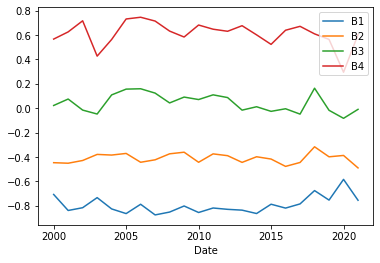

In [ ]:
breakpointDf.plot()

In [ ]:
breakpointDf

,B1,B2,B3,B4
Date,,,,
2000,-0.707958,-0.447353,0.021936,0.566544
2000,-0.707958,-0.447353,0.021936,0.566544
2000,-0.707958,-0.447353,0.021936,0.566544
2000,-0.707958,-0.447353,0.021936,0.566544
2000,-0.707958,-0.447353,0.021936,0.566544
...,...,...,...,...
2021,-0.755579,-0.490220,-0.009799,0.603175
2021,-0.755579,-0.490220,-0.009799,0.603175
2021,-0.755579,-0.490220,-0.009799,0.603175


In [ ]:
#index_value = 2001

# Create a new row as a Series with the desired index value and the data you want to add
#new_row = pd.Series([0], index=[index_value])

# Use the loc indexer to assign the new row to the annual_returns DataFrame with the desired index value
#breakpointDf.loc[index_value] = new_row

#breakpointDf

Forming groups

In [ ]:
#equally weighted
percentileDfUnivariate = pd.DataFrame(0, index=returns.index, columns=percentileGroup)

for date in range(returns.shape[0]):
    for x in range(0,nbOfPercentiles):
        if x==0:
            filter = monthly_b2m.iloc[date]<breakpointDf.iloc[date][x]
            percentileDfUnivariate.iat[date, x] = returns.iloc[date][filter].mean()
        if x==nbOfPercentiles-1:
            filter = monthly_b2m.iloc[date]>breakpointDf.iloc[date][x-1]
            percentileDfUnivariate.iat[date, x] = returns.iloc[date][filter].mean()
        if x>0 and x<(nbOfPercentiles-1):
            filter = (monthly_b2m.iloc[date]>breakpointDf.iloc[date][x-1]) & (monthly_b2m.iloc[date]<breakpointDf.iloc[date][x])
            percentileDfUnivariate.iat[date, x] = returns.iloc[date][filter].mean()

In [ ]:
percentileDfUnivariate

,P1,P2,P3,P4,P5
Date,,,,,
7/1/01,-0.079753,-0.081466,-0.035769,-0.021267,-0.012467
8/1/01,-0.110605,-0.084754,-0.074496,-0.041650,-0.013443
9/1/01,-0.109374,-0.120922,-0.044831,-0.062284,-0.025128
10/1/01,-0.198316,-0.170096,-0.141308,-0.123617,-0.097316
11/1/01,0.128922,0.056815,0.020619,-0.005031,-0.016258
...,...,...,...,...,...
2/1/22,-0.100203,-0.043328,-0.020208,-0.005139,0.016568
3/1/22,-0.077447,-0.074573,-0.045925,-0.032914,-0.040447
4/1/22,0.017579,0.022434,0.006839,0.041802,0.038296


In [ ]:
#cumulative index

indexlist = percentileDfUnivariate['P5'].tolist()

newlist = [x+1 for x in indexlist]

x = 100
newlist= [x] + newlist

In [ ]:
percentileDfUnivariate['Cumulative1'] = newlist[0:252]
percentileDfUnivariate

,P1,P2,P3,P4,P5,Cumulative1
Date,,,,,,
7/1/01,-0.079753,-0.081466,-0.035769,-0.021267,-0.012467,100.000000
8/1/01,-0.110605,-0.084754,-0.074496,-0.041650,-0.013443,0.987533
9/1/01,-0.109374,-0.120922,-0.044831,-0.062284,-0.025128,0.986557
10/1/01,-0.198316,-0.170096,-0.141308,-0.123617,-0.097316,0.974872
11/1/01,0.128922,0.056815,0.020619,-0.005031,-0.016258,0.902684
...,...,...,...,...,...,...
2/1/22,-0.100203,-0.043328,-0.020208,-0.005139,0.016568,1.024471
3/1/22,-0.077447,-0.074573,-0.045925,-0.032914,-0.040447,1.016568
4/1/22,0.017579,0.022434,0.006839,0.041802,0.038296,0.959553


In [ ]:
percentileDfUnivariate['Cumulative Frequency'] = percentileDfUnivariate['Cumulative1'].cumprod()

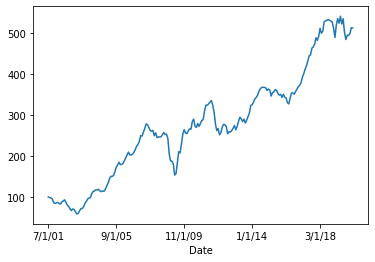

In [ ]:
percentileDfUnivariate['Cumulative Frequency'].plot(kind='line')

In [ ]:
cumulative_return_P5 = percentileDfUnivariate['Cumulative Frequency']

In [ ]:
import pandas_datareader as web

In [ ]:
ff_df = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start='2001-7-1', end='2022-06-30')[0]
rf = ff_df["RF"]/100
ff_df = ff_df[['Mkt-RF', 'SMB', 'HML']]
ff_df.index = cumulative_return_P5.index
rf.index = cumulative_return_P5.index
ff_df

,Mkt-RF,SMB,HML
Date,,,
7/1/01,-2.13,-4.19,5.21
8/1/01,-6.46,2.48,2.30
9/1/01,-9.25,-6.23,1.45
10/1/01,2.46,7.49,-7.66
11/1/01,7.54,-0.47,2.22
...,...,...,...
2/1/22,-2.29,2.23,3.04
3/1/22,3.05,-1.60,-1.80
4/1/22,-9.46,-1.41,6.19


In [ ]:
percentileDfUnivariate['P5']

Date
7/1/01    -0.012467
8/1/01    -0.013443
9/1/01    -0.025128
10/1/01   -0.097316
11/1/01   -0.016258
             ...   
2/1/22     0.016568
3/1/22    -0.040447
4/1/22     0.038296
5/1/22    -0.016762
6/1/22     0.001334
Name: P5, Length: 252, dtype: float64

In [ ]:
x = ff_df/100
y = percentileDfUnivariate['P5']
y[224]=-0.15777067578683382 #this is the min value ever registered assigned instead of inf
y[224]
model = sm.OLS(y, x, missing='drop')
results = model.fit()

In [ ]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                     P5   R-squared (uncentered):                   0.054
Model:                            OLS   Adj. R-squared (uncentered):              0.042
Method:                 Least Squares   F-statistic:                              4.708
Date:                Sat, 17 Dec 2022   Prob (F-statistic):                     0.00324
Time:                        17:59:43   Log-Likelihood:                          425.25
No. Observations:                 252   AIC:                                     -844.5
Df Residuals:                     249   BIC:                                     -833.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Optimization

In [ ]:
from numpy.linalg import inv
from scipy.optimize import minimize, LinearConstraint, NonlinearConstraint
import time

In [ ]:
returns
#monthly_b2m
#weights
returns.index = pd.DatetimeIndex(returns.index).strftime('%d-%m-%Y')
returns.index = pd.to_datetime(returns.index)
returns

,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,AEVIS VICTORIA,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-07,-0.147974,-0.075621,NaN,0.020439,-0.084609,NaN,-0.099370,0.043386,NaN,-0.058223,...,NaN,NaN,NaN,-0.038962,0.036036,NaN,0.009384,NaN,0.041946,0.012478
2001-01-08,-0.287020,-0.027302,NaN,0.024025,-0.119001,NaN,-0.025027,-0.086441,NaN,-0.011351,...,NaN,NaN,NaN,-0.034316,0.052174,NaN,0.013968,NaN,-0.083736,0.023261
2001-01-09,-0.161538,0.011247,NaN,-0.020741,-0.039002,NaN,-0.066516,-0.139795,NaN,-0.082365,...,NaN,NaN,NaN,-0.103567,0.016529,NaN,-0.027551,NaN,-0.173989,-0.090887
2001-01-10,-0.327220,-0.020357,NaN,-0.102199,-0.074946,NaN,-0.300008,-0.274993,NaN,-0.227289,...,NaN,NaN,NaN,-0.121174,-0.081301,NaN,-0.066509,NaN,-0.291488,0.000000
2001-01-11,0.290917,0.000000,NaN,-0.051276,0.293653,NaN,0.303564,0.051760,NaN,-0.044095,...,NaN,NaN,NaN,0.069590,0.053097,NaN,0.061147,NaN,0.124622,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-02,-0.089002,0.000000,-0.199973,0.000000,0.000000,-0.102041,-0.032342,0.024705,0.0,-0.033115,...,0.094513,0.0,-0.068422,-0.088139,0.000000,-0.014985,0.032166,-0.123181,0.082144,-0.103836
2022-01-03,-0.048227,0.000000,-0.441231,0.000000,0.000000,-0.045455,-0.094720,0.000000,0.0,0.054798,...,-0.114467,0.0,-0.111841,-0.064440,-0.125000,0.000000,-0.022665,-0.287596,-0.068182,0.195138
2022-01-04,0.016293,0.000000,0.368644,0.000000,0.000000,-0.079365,0.003415,-0.066332,0.0,0.181830,...,0.224335,0.0,0.026706,0.006377,0.142857,0.035516,0.052174,-0.100257,0.124391,-0.035707


In [ ]:
monthly_b2m.index = pd.DatetimeIndex(weights.index).strftime('%d-%m-%Y')
monthly_b2m.index = pd.to_datetime(monthly_b2m.index)
monthly_b2m

,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,AEVIS VICTORIA,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-06,-0.859124,2.219071,NaN,0.644115,-1.013859,NaN,-0.919256,-0.235448,NaN,-1.005765,...,-0.703641,NaN,NaN,-0.165414,0.655386,NaN,-0.084207,NaN,-0.588258,-0.248128
2001-01-07,-0.859124,2.219071,NaN,0.644115,-1.013859,NaN,-0.919256,-0.235448,NaN,-1.005765,...,-0.703641,NaN,NaN,-0.165414,0.655386,NaN,-0.084207,NaN,-0.588258,-0.248128
2001-01-08,-0.859124,2.219071,NaN,0.644115,-1.013859,NaN,-0.919256,-0.235448,NaN,-1.005765,...,-0.703641,NaN,NaN,-0.165414,0.655386,NaN,-0.084207,NaN,-0.588258,-0.248128
2001-01-09,-0.859124,2.219071,NaN,0.644115,-1.013859,NaN,-0.919256,-0.235448,NaN,-1.005765,...,-0.703641,NaN,NaN,-0.165414,0.655386,NaN,-0.084207,NaN,-0.588258,-0.248128
2001-01-10,-0.859124,2.219071,NaN,0.644115,-1.013859,NaN,-0.919256,-0.235448,NaN,-1.005765,...,-0.703641,NaN,NaN,-0.165414,0.655386,NaN,-0.084207,NaN,-0.588258,-0.248128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-02,-0.680464,NaN,-1.311612,NaN,NaN,-0.311575,-0.176766,0.767840,NaN,-0.364571,...,-0.621615,NaN,-0.698271,-0.477532,1.496612,0.569709,-0.505403,-0.692001,-0.151984,4.047161
2022-01-03,-0.680464,NaN,-1.311612,NaN,NaN,-0.311575,-0.176766,0.767840,NaN,-0.364571,...,-0.621615,NaN,-0.698271,-0.477532,1.496612,0.569709,-0.505403,-0.692001,-0.151984,4.047161
2022-01-04,-0.680464,NaN,-1.311612,NaN,NaN,-0.311575,-0.176766,0.767840,NaN,-0.364571,...,-0.621615,NaN,-0.698271,-0.477532,1.496612,0.569709,-0.505403,-0.692001,-0.151984,4.047161


In [ ]:
weights

,ABB LTD,ACCU HOLDING AG,ACHIKO AG,ACINO INTERNAT,ACTELION AG,ADDEX THERAPEUTICS,ADECCO GROUP,ADVAL TECH HOLDING A,ADVANCED DIGITAL,AEVIS VICTORIA,...,WEATHERFORD INTERNTL,WINTERTHUR TECH,YPSOMED HOLDING AG,ZEHNDER GROUP AG,ZUBLIN IMMOBILIEN,ZUG ESTATES,ZUGER KANTONALBANK,ZUR ROSE GROUP AG,ZURICH INSURANCE,ZWAHLEN & MAYR S.A.
Date,,,,,,,,,,,,,,,,,,,,,
6/1/01,0.210792,1.715156e-06,NaN,0.000017,NaN,NaN,0.002464,7.610184e-06,NaN,0.000011,...,NaN,NaN,NaN,0.000035,3.542573e-06,NaN,0.000018,NaN,0.047719,2.998605e-06
7/1/01,0.192946,1.703262e-06,NaN,0.000019,NaN,NaN,0.002384,8.530369e-06,NaN,0.000011,...,NaN,NaN,NaN,0.000036,3.942950e-06,NaN,0.000019,NaN,0.053415,3.261612e-06
8/1/01,0.155375,1.871234e-06,NaN,0.000022,NaN,NaN,0.002625,8.801829e-06,NaN,0.000013,...,NaN,NaN,NaN,0.000039,4.685730e-06,NaN,0.000022,NaN,0.055278,3.769528e-06
9/1/01,0.136808,1.987154e-06,NaN,0.000023,NaN,NaN,0.002573,7.950985e-06,NaN,0.000012,...,NaN,NaN,NaN,0.000037,5.001993e-06,NaN,0.000023,NaN,0.047950,3.598742e-06
10/1/01,0.105915,2.240121e-06,NaN,0.000023,NaN,NaN,0.002073,6.633392e-06,NaN,0.000011,...,NaN,NaN,NaN,0.000037,5.287966e-06,NaN,0.000024,NaN,0.039094,4.141170e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/1/22,0.066541,2.026032e-09,0.000042,0.000013,0.001739,2.894664e-07,0.000395,3.981989e-07,0.000001,0.000169,...,0.000061,0.000008,0.000023,0.000139,1.772019e-09,5.369397e-07,0.000003,0.000009,0.007783,2.064952e-08
3/1/22,0.064613,2.067019e-09,0.000024,0.000014,0.001774,2.818985e-07,0.000364,4.062545e-07,0.000001,0.000182,...,0.000055,0.000008,0.000020,0.000133,1.581884e-09,5.478019e-07,0.000003,0.000007,0.007399,2.517828e-08
4/1/22,0.064161,2.019643e-09,0.000032,0.000013,0.001734,2.535773e-07,0.000357,3.706131e-07,0.000001,0.000210,...,0.000065,0.000008,0.000020,0.000131,1.766431e-09,5.542563e-07,0.000003,0.000006,0.008129,2.372277e-08


In [ ]:
returns.fillna(0, inplace=True)
monthly_b2m.fillna(0, inplace=True)
weights.fillna(0, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [ ]:
startTime = time.time()

threshold = 0.01

numberOfPeriods = returns.shape[0]

# create weights vector with 0 for all stocks
wOptimum = pd.DataFrame(0, index=returns.index, columns=returns.columns)

for row in range(numberOfPeriods):
    
    if row == 0 or returns.iloc[row].name.day == 1:
        print(f"\nRebalancing date: {returns.iloc[row].name:%d-%m-%Y}")
        
        # filter for valid stocks
        filter = ((monthly_b2m.iloc[row].notnull()))
        if row == 0:
            wMCLast = weights.iloc[row+1, filter.values]
        else:
            wMCLast = weights.iloc[row, filter.values]
        numberOfAssets = len(wMCLast)

        # define some parameters
        e = np.ones((numberOfAssets,1))
        bounds = [(0.,0.06)] * numberOfAssets
        x0 = np.ones((numberOfAssets, 1))/numberOfAssets

        # Objective function and constraints
        objFunction = lambda x: -(x.T @ monthly_b2m.iloc[row, filter.values])

        Aeq = np.eye(numberOfAssets)
        beqUp = wMCLast+threshold
        beqLo = np.where(wMCLast<threshold,0,wMCLast-threshold) 
        
        budgetConstraint = lambda x: (e.T @ x) - 1
        low_bound_constraint = lambda x: Aeq @ x - beqLo
        up_bound_constraint = lambda x: beqUp - Aeq @ x
        constraints = ({'type': 'eq', 'fun': budgetConstraint},
                      {'type': 'ineq', 'fun': low_bound_constraint},
                      {'type': 'ineq', 'fun': up_bound_constraint})

        # Run optimization
        result = minimize(objFunction, wMCLast, bounds=bounds, constraints=constraints)

        # Collect results
        wOptimum.iloc[row, filter.values] = result.x 

        # Print a few statements to monitor the loop
        print(f"Number of valid stocks: {numberOfAssets}")
        print(result.message)
        print(f"Exposure to factor: {-result.fun:.3f}")       
        
    else:
        wOptimum.iloc[row, filter.values] = wOptimum.iloc[row-1, filter.values]

print(f"Time to execute: {time.time() - startTime:.0f} seconds")  


Rebalancing date: 07-01-2001
Number of valid stocks: 264
Positive directional derivative for linesearch
Exposure to factor: 0.238

Rebalancing date: 01-01-2002
Number of valid stocks: 264
Positive directional derivative for linesearch
Exposure to factor: 0.035

Rebalancing date: 01-01-2003
Number of valid stocks: 264
Positive directional derivative for linesearch
Exposure to factor: -0.009

Rebalancing date: 01-01-2004
Number of valid stocks: 264
Positive directional derivative for linesearch
Exposure to factor: 0.034

Rebalancing date: 01-01-2005
Number of valid stocks: 264
Positive directional derivative for linesearch
Exposure to factor: 0.063

Rebalancing date: 01-01-2006
Number of valid stocks: 264
Positive directional derivative for linesearch
Exposure to factor: -0.056

Rebalancing date: 01-01-2007
Number of valid stocks: 264
Positive directional derivative for linesearch
Exposure to factor: -0.077

Rebalancing date: 01-01-2008
Number of valid stocks: 264
Positive directional d

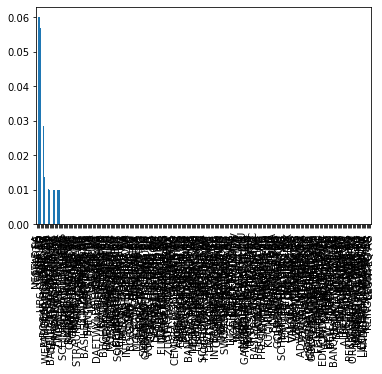

In [ ]:
wOptimum.loc["01-01-2022"].sort_values(ascending=False).plot(kind="bar")

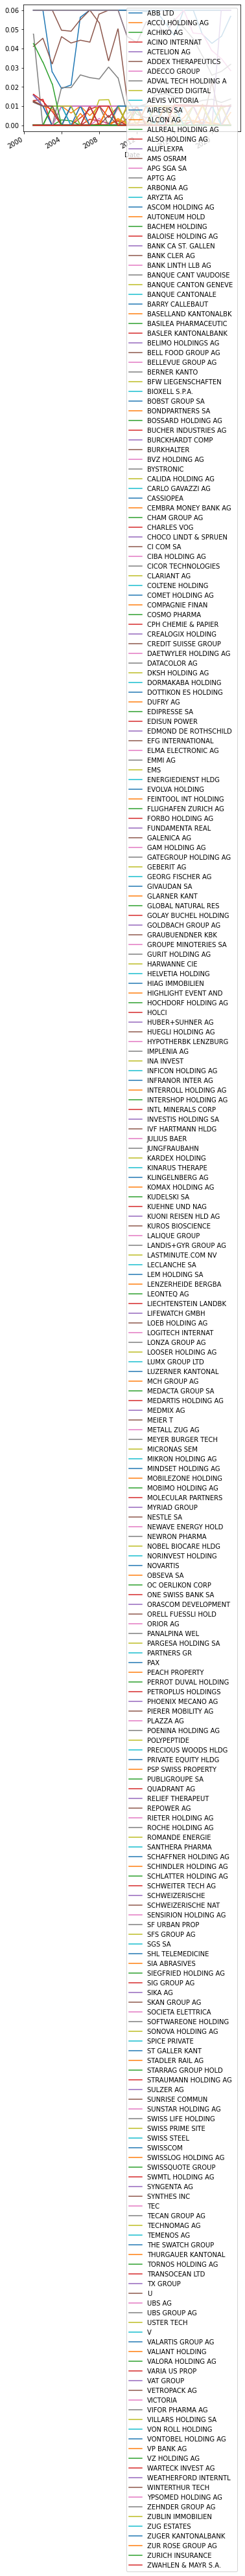

In [ ]:
wOptimum.plot()

In [ ]:
returnValueOptimizedPtf = (wOptimum*returns).sum(axis=1)
returnValueOptimizedPtf

Date
2001-01-07   -0.023867
2001-01-08   -0.044493
2001-01-09   -0.022189
2001-01-10   -0.069733
2001-01-11    0.037778
                ...   
2022-01-02   -0.015432
2022-01-03   -0.012919
2022-01-04    0.016748
2022-01-05   -0.004706
2022-01-06   -0.004423
Length: 252, dtype: float64

# Download of Files

In [ ]:
#y.to_csv('y.csv') 
#files.download('y.csv')

#df_norm_final.to_csv('df_norm_final.csv') 
#files.download('df_norm_final.csv')

In [ ]:
#just as a reminder

returnValueOptimizedPtf = (wOptimum*returns).sum(axis=1)
return_df["Optimized LO"] = returnValueOptimizedPtf
return_df["Optimized LS"] = return_df["Optimized LO"] - return_df["MC"]
ptf_df["Optimized LO"] = (1+return_df["Optimized LO"]).cumprod()
ptf_df["Optimized LS"] = (1+return_df["Optimized LS"]).cumprod()
returnsDf = pd.DataFrame(returnValueOptimizedPtf.loc["2005":"2021"], index=returns.loc["2005":"2021"].index, columns=["Optimized Ptf"])
returnsDf["Univariate LO"] = percentileDfUnivariate.loc["2005":"2021"]["P5"]
#returnsDf["Bivariate LO"] = percentileDfBivariate.loc["2005":"2021"]["Long"]
perfValueOpt = (1+(wOptimum*returns).sum(axis=1)).cumprod().loc["2005":"2021"]